### Calculando a distância até a praia


-- dados: https://www.data.rio/datasets/cobertura-vegetal-e-uso-da-terra-2016-1

-- dados: https://opendata.arcgis.com/datasets/a22768dc645043f5bdfd1affab888ded_0.geojson


In [1]:
%matplotlib inline
import geopandas as gpd

In [21]:
def cria_dir(pasta:str, path='dados/processados/mapas'):
    '''
    Função para criar diretorios em um caminho especificado
    '''
    import os

    dir_ = f'{path}/{pasta}' 
    if not os.path.exists(dir_):
        os.makedirs(dir_)
    
    return dir_

In [4]:
praias = gpd.read_file('dados/originais/vegetacao_uso_solo/Cobertura_Vegetal_e_Uso_da_Terra_2016.geojson')
praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [5]:
g_rj = gpd.read_file('dados/originais/RJ/RJ_Municipios_2019.shp')
g_rj = g_rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs ')
g_rj = g_rj.loc[g_rj['NM_MUN'] == 'Rio de Janeiro']
geo_dados = gpd.read_file('dados/processados/mapas/RJ-DATASET/RJ-DATASET.shp')

In [6]:
praias.head()

,Sigla,ANO,legenda,ShapeSTArea,ShapeSTLength,OBJECTID,GRUPO,CLASSE,FORMACOES,ESTAGIO_SUCESSIONAL,"SMAC""RIO\02497196""Mapeamento_CoberturaArea",geometry
0,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,8684.890625,441.128326,19870,Outros,Corpos d’água continentais,,,8684.889153,"POLYGON ((646.900 7448.811, 646.889 7448.795, ..."
1,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,2209.344727,241.436403,19871,Outros,Corpos d’água continentais,,,2209.343321,"POLYGON ((643.818 7450.482, 643.808 7450.475, ..."
2,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,17015.344727,468.728882,19872,Outros,Corpos d’água continentais,,,17015.344086,"POLYGON ((643.702 7450.429, 643.685 7450.427, ..."
3,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,17597.541016,916.463204,19873,Outros,Corpos d’água continentais,,,17597.540796,"POLYGON ((642.611 7451.002, 642.594 7450.992, ..."
4,Vg,2016-01-01T00:00:00+00:00,Vegetação gramíneo-lenhosa,11834.875977,605.329142,19874,Antropismo,Vegetação gramíneo-lenhosa,,,11834.876012,"POLYGON ((646.501 7449.279, 646.482 7449.269, ..."


<AxesSubplot:>

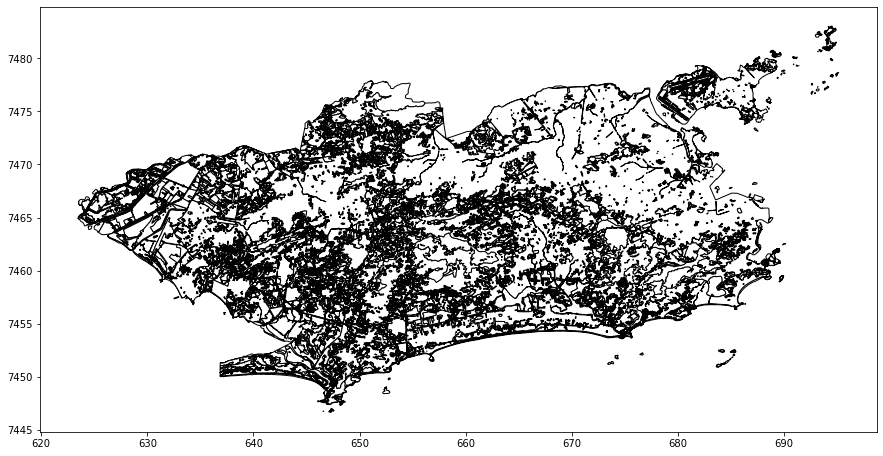

In [9]:
praias.plot(color='white', edgecolor='black', figsize=(15,8))

In [10]:
praias['legenda'].value_counts()

Vegetação arbórea não florestal                                     3495
Vegetação gramíneo-lenhosa                                          2022
Floresta Ombrófila Densa, Estágio Inicial                            643
Áreas Urbanas                                                        639
Afloramento Rochoso                                                  474
Uso agrícola, Lavoura Permanente                                     445
Floresta Ombrófila Densa, Estágio Médio                              414
Corpos d’água continentais                                           388
Reflorestamento                                                      252
Formação Pioneira com influência flúvio-lacustre, Brejo herbáceo     210
Uso agrícola, Lavoura Temporária                                     164
Formação Pioneira com influência flúvio-marinha, Manguezal           161
Solo exposto                                                         152
Formação Pioneira com influência flúvio-marinha, Ca

In [11]:
praias = praias.loc[praias['legenda'] == 'Praia']

<AxesSubplot:>

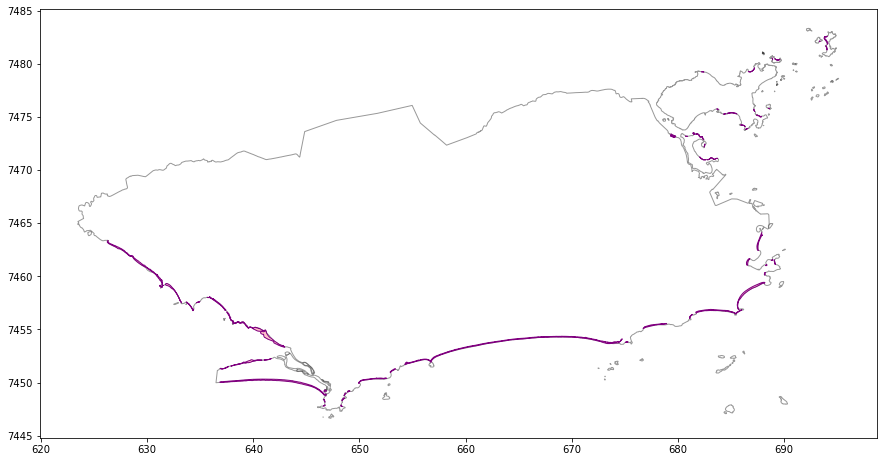

In [17]:
base = g_rj.plot(color='white', edgecolor='black', alpha=0.4, figsize=(15,8))
praias.plot(ax=base, color='pink', edgecolor='purple')

In [18]:
geo_dados['Dist_Praia'] = geo_dados['geometry'].apply(lambda x: praias.distance(x).min())

In [19]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,Dist_Trans,geometry,Dist_Praia
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,0.443193,POINT (657.514 7453.832),1.143453
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,3.642787,POINT (670.524 7461.803),7.478698
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,0.641470,POINT (674.345 7469.440),6.240694
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,0.422370,POINT (662.701 7457.284),3.404589
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,0.214605,POINT (656.019 7453.574),1.369015


In [20]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro,Dist_Trans,Dist_Praia
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671,-0.042684,-0.290745
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864,0.358735,0.560701
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788,-0.031812,-0.317743
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794,-0.014628,-0.185829
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521,0.006363,-0.196554
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787,0.070240,-0.104570
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641,-0.103653,-0.361519
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000,0.261040,0.187805
Dist_Trans,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,0.261040,1.000000,0.230641
Dist_Praia,-0.290745,0.560701,-0.317743,-0.185829,-0.196554,-0.104570,-0.361519,0.187805,0.230641,1.000000


In [22]:
diretorio = cria_dir('RJ-DATASET')
geo_dados.to_file(diretorio)

###  Exercício da aula

O que faremos neste exercício é medir distâncias entre polígonos.
Considere o GeoDataFrame estado_rj que possui informações de todos os municípios do estado do Rio de Janeiro.
indique qual o município mais distante do município do Rio de Janeiro e qual a distância em quilômetros.

In [23]:
g_rj = gpd.read_file('dados/originais/RJ/RJ_Municipios_2019.shp')
g_rj = g_rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs ')

In [24]:
municipio_rj = g_rj.loc[g_rj['NM_MUN'] == 'Rio de Janeiro']

In [25]:
municipio_rj['Munic_Longe'] = g_rj['NM_MUN'].iloc[g_rj.distance(municipio_rj.iloc[0]['geometry']).idxmax()]
municipio_rj['Dist_Max'] = "{0:.2f} km".format(g_rj.distance(municipio_rj.iloc[0]['geometry']).max())

C:\Users\halissonsg\Anaconda3\envs\panel\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [26]:
municipio_rj

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,Munic_Longe,Dist_Max
67,3304557,Rio de Janeiro,RJ,1200.329,"MULTIPOLYGON (((632.953 7457.528, 632.956 7457...",Varre-Sai,233.16 km
